### 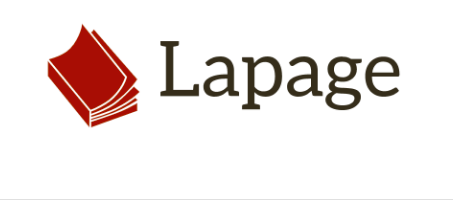 **Librairie généraliste**

# Introduction

L'entreprise Lapage était une librairie physique qui avait plusieurs points de ventes. L'augmentation de sa clientèle lui a amener à mettre en place un site de vente en ligne afin de faciliter le flux de ses produits et augmentater sa performance. Après 2 ans, l'entreprise decide de faire le bilan de ses prestations en ligne pour analyser ses points forts, ses points faibles et le comportement de ses clients. 


**L'objectif principal est de faire une analyse détaillée des ventes de la librairie Laplace.**

Objectifs spécifiques: 
- Analyse des différents indicateurs de vente, demandée par Antoine le chargé de produit marketing
- Analyse du comportement des cllients en ligne et les comparer avec ceux de la librairie physique, demandé par Julie la chargée d'étude marketing.


# Definition des termes 

**id_prod**: est l'identifiant du produit

**id_client**: identifiant du client 

**transaction** est une opération commerciale. Contrat par lequel les parties terminent une contestation ou en préviennent une autre, moyennant un prix ou des concessions réciproques

**categorie**: Ensemble de personnes ou de choses de même nature

**Id_session** est un numéro d’identification généré par le serveur afin d’attribuer les demandes d’un utilisateur à la session en cours. Cet ID de session est localement sauvegardé par l’utilisateur sous la forme d’un cookie ou d’un attribut URI (Uniform Resource Identifier).

# 1.Import des librairie de Python 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# 1.Lecture des données

In [2]:
product_df = pd.read_csv("products.csv")
transaction_df = pd.read_csv("transactions.csv")
customer_df = pd.read_csv("customers.csv")

# 3. Exploratory Data Analysis

### Dataset: product

* Decouverte des 5 premières lignes

In [3]:
product_df.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


* Verifier la taille du DataFrame

In [4]:
product_df.shape

(3287, 3)

* Identifier les valeurs manquantes

In [5]:
product_df.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

* Verification des types de données

In [6]:
product_df.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

Considérons la variable **id_prod** comme une clé candidate.

* Verification des doublons dans la variable **id_prod** 

In [7]:
product_df["id_prod"].duplicated().sum()

0

* Compare **id_prod** and the du data frame **product_df** length

In [8]:
product_df["id_prod"].nunique()==len(product_df)

True

Le nombre de valeurs uniques de la variable **id_prod** est égale à la longueur du data frame **product_df**. 
Donc la variable **id_prod est la  clé primaire de cette table**

* Analyse statistique descriptive

In [9]:
product_df.describe(include="number")

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Le prix moyen des produits est de 21.86 euro et le prix maximum est de 300 euro. Cependant le prix mimum est négatif (<0)

* Recherche de valeurs négative dans la variable **price** 

In [10]:
negative_price = product_df[product_df["price"] < 0]

In [11]:
negative_price

,id_prod,price,categ
731,T_0,-1.0,0


Le produit **T_0** de la ligne **731** a un prix négatif. Ce dernier n'a aucune signification logiquement. Il est préférable de supprimer cette ligne.

* Delete row **731** of the dataframe

In [12]:
product_df = product_df[product_df['id_prod']!='T_0']

* Decouverte des 5 premières lignes

In [13]:
product_df.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


* Vérification de la taille du dataframe 

In [14]:
product_df.shape

(3286, 3)

In [15]:
product_df.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Le prix moyen est de 21.86 euro et le minimum est de 0.62 euro et le prix maximum est de 300 euro. Ces prix seraient concordantes.

* Visualisation de la repartition des prix  

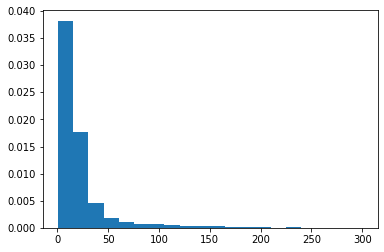

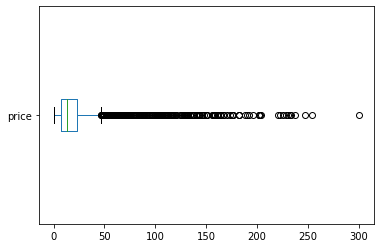

In [16]:
product_df['price'].hist(bins=20, density=True, grid=False)
plt.show()
product_df.boxplot(column="price", vert=False, grid=False)
plt.show()

La distribution des prix des produits est asymétrique particulièrement à gauche. La majorité des prix des produits est plus petite et en dessous de 50 euro.
Les prix des produits contiennent des outliers.

* Identification des valeurs uniques de la variable **categ**

In [17]:
product_df.categ.unique()

array([0, 1, 2])

La variable **categ** comporte 3 valeurs uniques. 

* Regroupons les produits par catégorie

In [18]:
product_df[["id_prod","categ"]].groupby(["categ"]).count()

,id_prod
categ,
0,2308
1,739
2,239


* Visualisation de la variable **categ** à partir d'un barplot

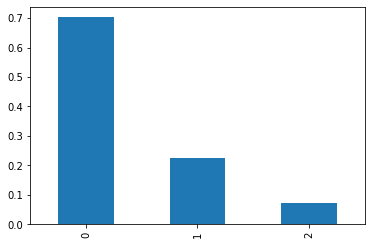

In [19]:
product_df['categ'].value_counts(normalize=True).plot(kind='bar')

Les produits de **categ 0** représentent **70%**, ceux de **categ 1** et **2** représentent    
   respectivement **20%** et **10%** de l'ensemble des produits. 

**Conclusion:** 

 - Le prix moyen des produits est de 21.86 euros, le prix median est 13.07 euro et seulement 25% ont un prix au dessus de 22.99 euro.
 - La catégorie 0 est dominante et représente 70% de l'ensemble des produits.
 - La ligne **731** qui comporte un id_prod **T_0**  et un **prix négatif** a été supprimé du data frame. Cette valeur correspondrait à un test lors de l'enregistrement des données.

### Dataset: customer 

* Decouverte des 5 premières lignes du data frame

In [20]:
customer_df.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


* Vérification de la taille du data frame

In [21]:
customer_df.shape

(8623, 3)

* Identification des valeurs manquantes 

In [22]:
customer_df.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

* Vérification des types de données

In [23]:
customer_df.dtypes

client_id    object
sex          object
birth         int64
dtype: object

* Determination de l'âge des clients à partir de la date de naissance  

In [24]:
customer_df["age"] = 2021 - customer_df["birth"]

In [25]:
customer_df.head()

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78


* Analyse descriptive statistique de la variable numérique et catégorique

In [26]:
customer_df.describe()

,birth,age
count,8623.000000,8623.000000
mean,1978.280877,42.719123
std,16.919535,16.919535
min,1929.000000,17.000000
25%,1966.000000,29.000000
50%,1979.000000,42.000000
75%,1992.000000,55.000000
max,2004.000000,92.000000


L'âge minimum est de 17 ans
L'âge maximum est de 92 ans 
L'âge moyen est égal à l'âge median: 42 ans. 

* Visualisation de la repartition de l'âge des clients à partir d'un histogramme

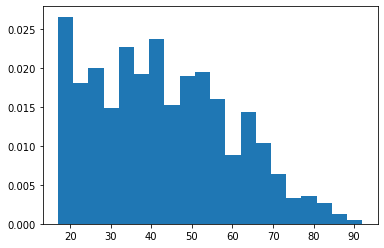

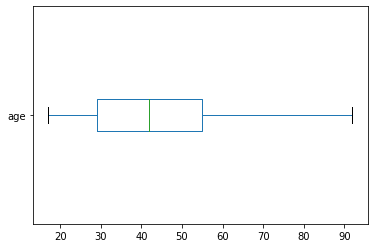

In [27]:
customer_df['age'].hist(density=True, bins=20, grid=False)
plt.show()
customer_df.boxplot(column='age', vert=False, grid=False)
plt.show()

La distribution de l'age des clients est homogène.L'age moyen est de 42 ans. Le nombre de clients ayant un age au dessus de 42 ans est égal au nombre de clients ayant un age en dessous de 42 ans. On observe donc une symétrie au niveau de l'age à partir de 42 ans qui suit une loi normale. 

In [28]:
customer_df.describe(include="object")

,client_id,sex
count,8623,8623
unique,8623,2
top,c_2422,f
freq,1,4491


La variable **client_id** comporte autant de lignes que de valeurs uniques. La variable **sex** contient **deux** valeurs uniques.
La variable **client_id** est une clé candidate

* Vérification de doubons dans la varaible **client_id**

In [29]:
customer_df['client_id'].duplicated().sum()

0

* Comparaison du nombre de valeurs uniques dans la variable **client_id** et la taille du data frame 

In [30]:
customer_df['client_id'].nunique()== len(customer_df)

True

Il n'ya pas de doublon et **client_id** est la **clé primaire de cette table**

* Identification des valeurs uniques de la variable **sex** 

In [31]:
customer_df.sex.unique()

array(['f', 'm'], dtype=object)

* Analyse des clients par sexe 

In [32]:
customer_df[["sex","age"]].groupby(['sex']).count()

,age
sex,
f,4491
m,4132


In [33]:
customer_df[["age","sex"]].groupby(["sex"]).mean()

,age
sex,
f,43.005121
m,42.408277


* Visualisation du nombre de clients par sexe à partir d'un bar plot

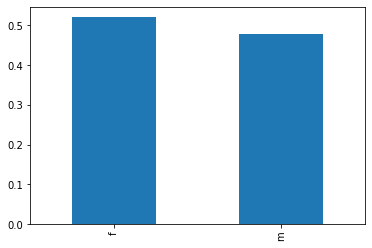

In [34]:
customer_df['sex'].value_counts(normalize=True).plot(kind='bar')

**Conclusion**
- L'age moyen et l'age median des clients sont de 42 ans. La repatition de l'age des clients est symétrique donc suit une loi normale. L'age minimum de 17 ans et maximum de 92 ans. 
- Les clients sont composés de 55% de sexe féminin et 45% de sexe masculin.

### Dataset: transaction 

* Découverte des 5 premières lignes

In [35]:
transaction_df.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


* Vérification de la taille du data frame

In [36]:
transaction_df.shape

(679532, 4)

* Vérification des valeurs manquantes 

In [37]:
transaction_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

* Vérification des types de données 

In [38]:
transaction_df.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

* Analyse statistique descriptive des variables catégoriques

In [39]:
transaction_df.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


La variable **date** contient des valeurs commençant par **test**

* Analyse des valeurs commençant par **test** dans la variable **date**

In [40]:
test_list = transaction_df[transaction_df["date"].str.startswith("test")]

In [41]:
test_list.head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


* Vérification dela longueur de **test_list** 

In [42]:
len(test_list)

200

La liste contient **200** valeurs commençant par **test** 

* Analyse statistique descriptive de **test_list**

In [43]:
test_list.describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


Les valeurs commençant par **test** dans la variable **date** correspondent au même produit **T_0** et au même id_session **s_0**. Ces valeurs n'ont pas de valeur significative parce qu'elles correspondraient aux prix négatifs dans la table des produits **T_0** 
La variable **client_id** a deux valeurs uniques.

* Identification des 2 valeurs uniques de la variable **client_id** 

In [44]:
test_list.groupby(["client_id"]).count()

,id_prod,date,session_id
client_id,,,
ct_0,106,106,106
ct_1,94,94,94


La variable **client_id** contient deux valeurs uniques **ct_0** et **ct_1** .

* Suppression des lignes commençant par **test** dasn le dataframe

In [45]:
transaction_df = transaction_df[transaction_df['id_prod']!='T_0'].sort_values(by='id_prod', ascending=True)

In [46]:
transaction_df.head()

,id_prod,date,session_id,client_id
628017,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672
186933,0_0,2022-08-24 02:59:36.000369,s_257618,c_2596
389268,0_0,2021-11-09 08:32:06.615844,s_116977,c_8486
592179,0_0,2021-08-18 17:21:16.393989,s_77507,c_1609
536458,0_0,2021-04-16 02:19:21.368517,s_21175,c_7092


In [47]:
transaction_df.describe()

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-04-10 03:39:27.553852,s_118668,c_1609
freq,2252,1,14,25488


La variable **session_id** contient **342315 valeurs uniques**
Dans un e-commerce une session est attribuée à une transaction. 
Considérons variale **session_id** comme une clé candidate.

* Vérification de doublons dans la variable **session_id**

In [48]:
transaction_df['session_id'].duplicated().sum()

337017

* Identification du nombre de valeurs uniques dans la variable **session_id**

In [49]:
transaction_df['session_id'].nunique()

342315

**Conclusion**
- Les lignes commençant par **test** correspondent à celles des produits **T_0**. Donc ont été supprimées dans cette table.
- La variable **session_id** est la clé primaire de cette table.

## Join Dataset

### First Outer Join: transaction_df and product_df from id_prod

In [50]:
transaction_product_df = transaction_df.merge(product_df, on="id_prod", how="outer")

In [51]:
transaction_product_df.head()

,id_prod,date,session_id,client_id,price,categ
0,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672,3.75,0.0
1,0_0,2022-08-24 02:59:36.000369,s_257618,c_2596,3.75,0.0
2,0_0,2021-11-09 08:32:06.615844,s_116977,c_8486,3.75,0.0
3,0_0,2021-08-18 17:21:16.393989,s_77507,c_1609,3.75,0.0
4,0_0,2021-04-16 02:19:21.368517,s_21175,c_7092,3.75,0.0


* DataFrame Size

In [52]:
transaction_product_df.shape

(679353, 6)

* DataFrame missing values

In [53]:
transaction_product_df.isnull().sum()

id_prod         0
date           21
session_id     21
client_id      21
price         221
categ         221
dtype: int64

La variable **id_prod** ne contient pas de valeurs manquantes.Par contre les variables **price** et **categ** contiennent des valeurs manquantes. Donc des produits ont un prix nulle. 

* Extract **null_price** from the DataFrame

In [54]:
null_price = transaction_product_df[transaction_product_df['price'].isnull()]

In [55]:
null_price.head()

,id_prod,date,session_id,client_id,price,categ
380095,0_2245,2023-02-16 05:53:01.627491,s_342289,c_7954,NaN,NaN
380096,0_2245,2021-05-12 03:36:34.586221,s_33316,c_6205,NaN,NaN
380097,0_2245,2023-01-01 00:09:29.301897,s_320155,c_580,NaN,NaN
380098,0_2245,2021-05-20 07:44:21.415061,s_36985,c_1450,NaN,NaN
380099,0_2245,2022-08-04 19:02:47.712837,s_248379,c_8595,NaN,NaN


In [56]:
len(null_price)

221

In [57]:
null_price.describe(include='object')

,id_prod,date,session_id,client_id
count,221,221,221,221
unique,1,221,221,100
top,0_2245,2022-03-11 03:28:02.080884,s_110231,c_6714
freq,221,1,1,6


In [58]:
null_price['id_prod'].unique()

array(['0_2245'], dtype=object)

Les produits qui ont un **null_price** appartiennent uniquement à la **categ 0** dont l'id_prod est **0_225**.

* Extract **categ_0** from the Dataframe

In [59]:
categ_0 = transaction_product_df[transaction_product_df['categ']==0]

In [60]:
categ_0.head()

,id_prod,date,session_id,client_id,price,categ
0,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672,3.75,0.0
1,0_0,2022-08-24 02:59:36.000369,s_257618,c_2596,3.75,0.0
2,0_0,2021-11-09 08:32:06.615844,s_116977,c_8486,3.75,0.0
3,0_0,2021-08-18 17:21:16.393989,s_77507,c_1609,3.75,0.0
4,0_0,2021-04-16 02:19:21.368517,s_21175,c_7092,3.75,0.0


In [61]:
categ_0.describe()

,price,categ
count,415475.000000,415475.0
mean,10.638330,0.0
std,4.933982,0.0
min,0.620000,0.0
25%,6.290000,0.0
50%,9.990000,0.0
75%,14.450000,0.0
max,40.990000,0.0


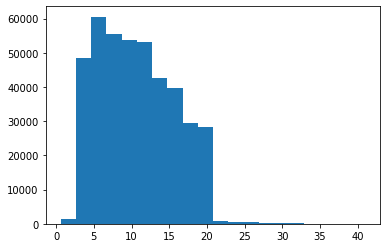

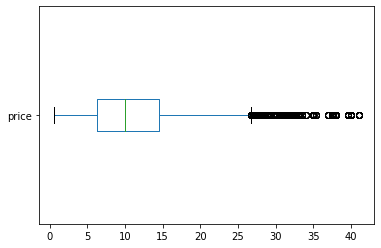

In [62]:
categ_0["price"].hist(bins=20, grid=False)
plt.show()
categ_0.boxplot('price', vert=False, grid=False)
plt.show()

La répartition des prix au niveau de la categ_0 est homogène et le **prix moyen = prix median.**  

## Impute Substitute Values 

* Impute  Mean for **price** variable

In [63]:
price_mean = categ_0['price'].mean()

In [64]:
price_mean

10.638329694985895

In [65]:
transaction_product_df['price'].fillna(price_mean, inplace=True)

* Impute Mode for **categ** variable

Le **mode** pour cette catégorie est celui de la **categ_0**

In [66]:
transaction_product_df['categ'].fillna(0.0, inplace=True)

In [67]:
transaction_product_df.isnull().sum()

id_prod        0
date          21
session_id    21
client_id     21
price          0
categ          0
dtype: int64

* Identify **null_session** from the Dataframe

In [68]:
print(f'Voici la liste des produits qui n\'ont pas été vendus')
null_session = transaction_product_df[transaction_product_df['session_id'].isnull()]
null_session 

Voici la liste des produits qui n'ont pas été vendus


,id_prod,date,session_id,client_id,price,categ
679332,0_1016,NaN,NaN,NaN,35.06,0.0
679333,0_1780,NaN,NaN,NaN,1.67,0.0
679334,0_1062,NaN,NaN,NaN,20.08,0.0
679335,0_1119,NaN,NaN,NaN,2.99,0.0
679336,0_1014,NaN,NaN,NaN,1.15,0.0
679337,1_0,NaN,NaN,NaN,31.82,1.0
679338,0_1318,NaN,NaN,NaN,20.92,0.0
679339,0_1800,NaN,NaN,NaN,22.05,0.0
679340,0_1645,NaN,NaN,NaN,2.99,0.0
679341,0_322,NaN,NaN,NaN,2.99,0.0


In [69]:
len(null_session)

21

* Delete missing values

In [70]:
transaction_product_df.dropna(inplace=True)

In [71]:
transaction_product_df.shape

(679332, 6)

In [72]:
transaction_product_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

**Conclusion**: 
- La présence des produits ayant un prix nul sont probablement dus à une omission des prix au cours de la saisie des données.
- Il ya 21 produits qui ont pas été vendus 

### 2nd Outer Join: transaction_product_df between customer_df from client_id

In [73]:
full_transaction_df = transaction_product_df.merge(customer_df, on="client_id", how='outer')

In [74]:
full_transaction_df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_0,2023-01-12 03:30:49.268477,s_325626,c_7672,3.75,0.0,m,1991,30
1,0_0,2022-01-12 03:30:49.268477,s_148545,c_7672,3.75,0.0,m,1991,30
2,0_0,2023-02-12 03:30:49.268477,s_340344,c_7672,3.75,0.0,m,1991,30
3,0_1033,2021-12-23 16:28:48.010193,s_138843,c_7672,7.99,0.0,m,1991,30
4,0_1060,2022-11-28 12:56:07.485622,s_304055,c_7672,12.53,0.0,m,1991,30


* DataFrame Size

In [75]:
full_transaction_df.shape

(679355, 9)

* DataFrame missing values

In [76]:
full_transaction_df.isnull().sum()

id_prod       23
date          23
session_id    23
client_id      0
price         23
categ         23
sex            0
birth          0
age            0
dtype: int64

* Exctract **null_prod** from the DataFrame

In [77]:
null_product = full_transaction_df[full_transaction_df['id_prod'].isnull()]

In [78]:
print(f'Voici la liste des clients dont les produits n\'ont pas identifiés')
null_product

Voici la liste des clients dont les produits n'ont pas identifiés


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
679332,NaN,NaN,NaN,c_8253,NaN,NaN,f,2001,20
679333,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997,24
679334,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998,23
679335,NaN,NaN,NaN,ct_0,NaN,NaN,f,2001,20
679336,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967,54
679337,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959,62
679338,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956,65
679339,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992,29
679340,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992,29
679341,NaN,NaN,NaN,c_6930,NaN,NaN,m,2004,17


In [79]:
len(null_product)

23

* Delete missing values

In [80]:
full_transaction_df.dropna(inplace=True)

In [81]:
full_transaction_df.shape

(679332, 9)

In [82]:
full_transaction_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

**Conclusion:**
- Il ya au total 23 produits qui n'ont pas d'identifiants et de prix. Cela est pourrait être dû à un bug. Donc ils ont été supprimés du data frame.

## Converting string to Datetime

In [83]:
full_transaction_df.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
age             int64
dtype: object

In [84]:
full_transaction_df['date'] = pd.to_datetime(full_transaction_df['date'])

* Date indexing

In [85]:
full_transaction_df = full_transaction_df.set_index("date")

In [86]:
full_transaction_df.sort_index(inplace=True)

In [87]:
full_transaction_df.head()

,id_prod,session_id,client_id,price,categ,sex,birth,age
date,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,1967,54
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,1960,61
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,1988,33
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,1989,32
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,1956,65


In [88]:
full_transaction_df['year'] = full_transaction_df.index.year
full_transaction_df['month'] = full_transaction_df.index.month

In [89]:
full_transaction_df.head()

,id_prod,session_id,client_id,price,categ,sex,birth,age,year,month
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,1967,54,2021,3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,1960,61,2021,3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,1988,33,2021,3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,1989,32,2021,3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,1956,65,2021,3


In [90]:
full_transaction_df.to_csv('transaction_final.csv')